# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Previsões Acionárias Baseadas em Indicadores</p>

![Previsões Acionárias Baseadas em Indicadores](https://github.com/jeffev/analise-mercado-financeiro-brasil/blob/main/imagens/prevendo_acoes.jpeg?raw=true)

# **Introdução**

- **Definição do Problema:**

O mercado de ações é um ambiente complexo e dinâmico, onde o valor das ações pode flutuar significativamente devido a diversos fatores. A análise de ações é a prática de avaliar empresas e determinar o valor intrínseco de suas ações. Essa avaliação é crucial para tomar decisões de investimento informadas e potencialmente lucrativas.

- **Objetivo:**

Este projeto tem como objetivo desenvolver um modelo para prever o valor de ações utilizando análise de indicadores financeiros. O modelo será treinado em um conjunto de dados históricos de indicadores financeiros coletados do site Status Invest. A partir da análise e do aprendizado dos padrões históricos, o modelo poderá ser utilizado para prever se uma ação está barata, cara ou neutra no momento atual.

- **Descrição do Problema:**

A principal dificuldade em prever o valor de ações reside na complexa interação de diversos fatores que influenciam o mercado. O objetivo do projeto é encontrar um modelo que capture as principais características e relações entre os indicadores financeiros para realizar previsões precisas.

- **Premissas e Hipóteses:**

  - Premissa: O valor de uma ação está diretamente relacionado aos seus indicadores financeiros.
  - Hipótese: Um modelo de machine learning treinado em um conjunto de dados históricos de indicadores financeiros pode ser utilizado para prever o valor futuro de ações com boa acurácia.

- **Restrições e Condições:**

  - Restrição: O modelo será treinado em dados históricos do site Status Invest.
  - Condição: O modelo será aplicado em ações com histórico de indicadores financeiros disponíveis no site.


## **Estrutura do projeto:**

[**1. Pré-processamento de dados:**](#1)

[**2. Análise da Distribuição dos Dados:**](#2)

[**3. Escolha do algoritmo:**](#3)

[**4. Otimização do modelo:**](#4)

[**5. Interpretação do modelo:**](#5)
   
[**6. Valiação dos resultados:**](#6)

[**7. Exportar modelo:**](#7)

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Pré-processamento de dados</p>

# Importar as bibliotecas

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Desativar os warnings de UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

# Carregar os dados 

Esse dataset foi criado através de web scraping no site Status Invest. Foram coletados os indicadores financeiros de 96 empresas atualmente listadas no índice IBXX, com o objetivo de selecionar empresas que não prejudicassem o treinamento do nosso modelo.

Link para o web scraping: [GitHub - scraper.py](https://github.com/jeffev/analise-mercado-financeiro-brasil/blob/main/src/scraping/scraper.py)

Após a coleta, os dados foram formatados e processados para serem armazenados em um único arquivo. Durante esse processamento, os seguintes passos foram realizados:

- O arquivo coletado tinha uma estrutura onde cada ano era representado por uma coluna. Para facilitar a análise, reorganizamos os dados para que os anos fossem representados em linhas.

- Os valores numéricos estavam formatados com caracteres especiais, como "11,75%", e foram ajustados para o formato padrão, como "11.75".

- Em vez de utilizar o caractere "-" para representar valores nulos, substituímos por "null" e removemos a coluna "Tipo do Indicador". Além disso, a coluna "ATUAL" foi renomeada para "2024".

- Criamos as colunas "ticker", "preço ano seguinte", "preço do ano atual" e "alvo".

Link para o processador: [GitHub - processor.py](https://github.com/jeffev/analise-mercado-financeiro-brasil/blob/main/src/data_processing/processor.py)

### Observações sobre a coluna alvo:
- "Barata": preço do ano seguinte 15% maior que o preço do ano atual.
- "Cara": preço do ano seguinte 15% menor que o preço do ano atual.
- "Neutra": preço do ano seguinte entre 85% e 115% do preço do ano atual.

In [93]:
# Carregue o arquivo Parquet do Github
df = pd.read_csv("https://raw.githubusercontent.com/jeffev/analise-mercado-financeiro-brasil/main/data/processed/dados_processados.csv")

# Visualize as primeiras linhas do DataFrame
df.head()

,Ano,D.Y,P/L,PEG RATIO,P/VP,EV/EBITDA,EV/EBIT,P/EBITDA,P/EBIT,VPA,...,ROE,ROA,ROIC,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,Ticker,PrecoAnoSeguinte,PrecoAnoAtual,Alvo
0,2024,11.75,5.68,-0.10,1.42,4.04,5.00,3.40,4.21,41.90,...,24.99,10.66,21.26,0.46,15.85,21.94,VALE3,NaN,67.141666,NaN
1,2023,7.87,7.37,-0.13,1.84,5.05,6.25,4.42,5.47,41.90,...,24.99,10.66,21.26,0.46,15.85,21.94,VALE3,67.141666,73.996923,Neutra
2,2022,8.53,4.43,NaN,2.27,4.06,5.16,3.70,4.70,39.15,...,51.27,21.16,28.76,0.50,15.85,40.33,VALE3,73.996923,80.667885,Neutra
3,2021,18.79,3.30,NaN,2.08,2.70,2.91,2.63,2.83,37.49,...,63.01,24.29,42.35,0.59,25.41,55.55,VALE3,80.667885,94.930192,Cara
4,2020,2.75,17.30,NaN,2.49,6.34,9.03,6.23,8.88,35.16,...,14.38,5.59,18.93,0.44,21.72,NaN,VALE3,94.930192,57.694231,Barata


In [94]:
df.shape

(1409, 35)

Temos 1409 registros, vamos verificar se os tipos de dados estão corretos

In [95]:
df.dtypes

Ano                       int64
D.Y                     float64
P/L                     float64
PEG RATIO               float64
P/VP                    float64
EV/EBITDA               float64
EV/EBIT                 float64
P/EBITDA                float64
P/EBIT                  float64
VPA                     float64
P/ATIVO                 float64
LPA                     float64
P/SR                    float64
P/CAP. GIRO             float64
P/ATIVO CIRC. LIQ.      float64
DÍV. LÍQUIDA/PL         float64
DÍV. LÍQUIDA/EBITDA     float64
DÍV. LÍQUIDA/EBIT       float64
PL/ATIVOS               float64
PASSIVOS/ATIVOS         float64
LIQ. CORRENTE           float64
M. BRUTA                float64
M. EBITDA               float64
M. EBIT                 float64
M. LÍQUIDA              float64
ROE                     float64
ROA                     float64
ROIC                    float64
GIRO ATIVOS             float64
CAGR RECEITAS 5 ANOS    float64
CAGR LUCROS 5 ANOS      float64
Ticker  

Os tipos de dados estão corretos. Agora, vamos lidar com os valores nulos. Vamos identificar as linhas que possuem mais de 5 colunas nulas e removê-las para não prejudicar nossa análise.

In [96]:
#linhas_com_mais_de_5_nulas = df.isnull().sum(axis=1) >= 6

#df_limpo = df.drop(df[linhas_com_mais_de_5_nulas].index)
df_limpo = df

# Selecionando as variáveis numéricas
numeric_vars = ['D.Y', 'P/L', 'PEG RATIO', 'P/VP', 'EV/EBITDA', 'EV/EBIT', 'P/EBITDA', 'P/EBIT', 'VPA',
                'ROE', 'ROA', 'ROIC', 'GIRO ATIVOS', 'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS']

# Calcular a mediana por ticker nas colunas selecionadas
median_by_ticker = df_limpo.groupby('Ticker')[numeric_vars].transform('median')

# Preencher os valores nulos com a mediana por ticker nas colunas selecionadas
df_limpo[numeric_vars] = df_limpo[numeric_vars].fillna(median_by_ticker)

# Preencher as colunas restantes com valor zero, exceto a coluna alvo
colunas_com_null = df_limpo.columns[df_limpo.isnull().any()].tolist()
colunas_para_preencher_com_zero = [coluna for coluna in colunas_com_null if coluna != 'Alvo']
df_limpo[colunas_para_preencher_com_zero] = df_limpo[colunas_para_preencher_com_zero].fillna(0)


df_limpo.shape

(1409, 35)

Sobrou 864 linhas. Agora vamos verificar nossa coluna alvo.

In [97]:
df_limpo["Alvo"].unique()

array([nan, 'Neutra', 'Cara', 'Barata'], dtype=object)

Como ele é uma variavel categorica vamos ajustar isso.

In [98]:
df_limpo["Alvo"] = df_limpo["Alvo"].replace({"Cara": 1, "Barata": 2, "Neutra": 3})

C:\Users\jeffe\AppData\Local\Temp\ipykernel_19200\2220005812.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_limpo["Alvo"] = df_limpo["Alvo"].replace({"Cara": 1, "Barata": 2, "Neutra": 3})


In [99]:
df_limpo

,Ano,D.Y,P/L,PEG RATIO,P/VP,EV/EBITDA,EV/EBIT,P/EBITDA,P/EBIT,VPA,...,ROE,ROA,ROIC,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,Ticker,PrecoAnoSeguinte,PrecoAnoAtual,Alvo
0,2024,11.75,5.680,-0.10,1.42,4.04,5.00,3.40,4.210,41.900,...,24.99,10.66,21.26,0.46,15.85,21.94,VALE3,0.000000,67.141666,NaN
1,2023,7.87,7.370,-0.13,1.84,5.05,6.25,4.42,5.470,41.900,...,24.99,10.66,21.26,0.46,15.85,21.94,VALE3,67.141666,73.996923,3.0
2,2022,8.53,4.430,-0.08,2.27,4.06,5.16,3.70,4.700,39.150,...,51.27,21.16,28.76,0.50,15.85,40.33,VALE3,73.996923,80.667885,3.0
3,2021,18.79,3.300,-0.08,2.08,2.70,2.91,2.63,2.830,37.490,...,63.01,24.29,42.35,0.59,25.41,55.55,VALE3,80.667885,94.930192,1.0
4,2020,2.75,17.300,-0.08,2.49,6.34,9.03,6.23,8.880,35.160,...,14.38,5.59,18.93,0.44,21.72,21.94,VALE3,94.930192,57.694231,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2012,0.00,3.465,0.00,0.41,7.72,-6.55,2.62,2.775,32.400,...,9.50,2.97,10.90,1.44,-2.72,2.55,PCAR3,9.929399,9.929399,3.0
1405,2011,0.00,3.465,0.00,0.41,7.72,-6.55,2.62,2.775,29.330,...,9.42,2.13,9.66,1.38,-2.72,2.55,PCAR3,9.929399,9.921676,3.0
1406,2010,0.00,3.465,0.00,0.41,7.72,-6.55,2.62,2.775,38.515,...,8.70,2.07,7.76,1.07,-2.72,2.55,PCAR3,9.921676,8.948007,3.0
1407,2009,0.00,3.465,0.00,0.41,7.72,-6.55,2.62,2.775,38.515,...,9.20,3.27,7.88,1.24,-2.72,2.55,PCAR3,8.948007,4.338963,2.0


<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;"> Análise da Distribuição dos Dados</p>

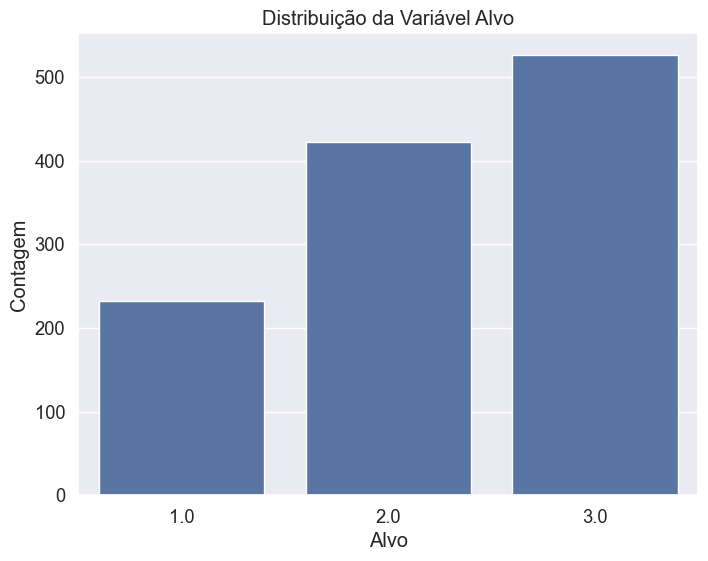

In [100]:
# Plotando gráfico de barras para a variável categórica 'Alvo'
plt.figure(figsize=(8, 6))
sns.countplot(x='Alvo', data=df_limpo)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Alvo')
plt.ylabel('Contagem')

plt.show()

Está um pouco desbalanceado mas não muito, então vamos deixar assim.

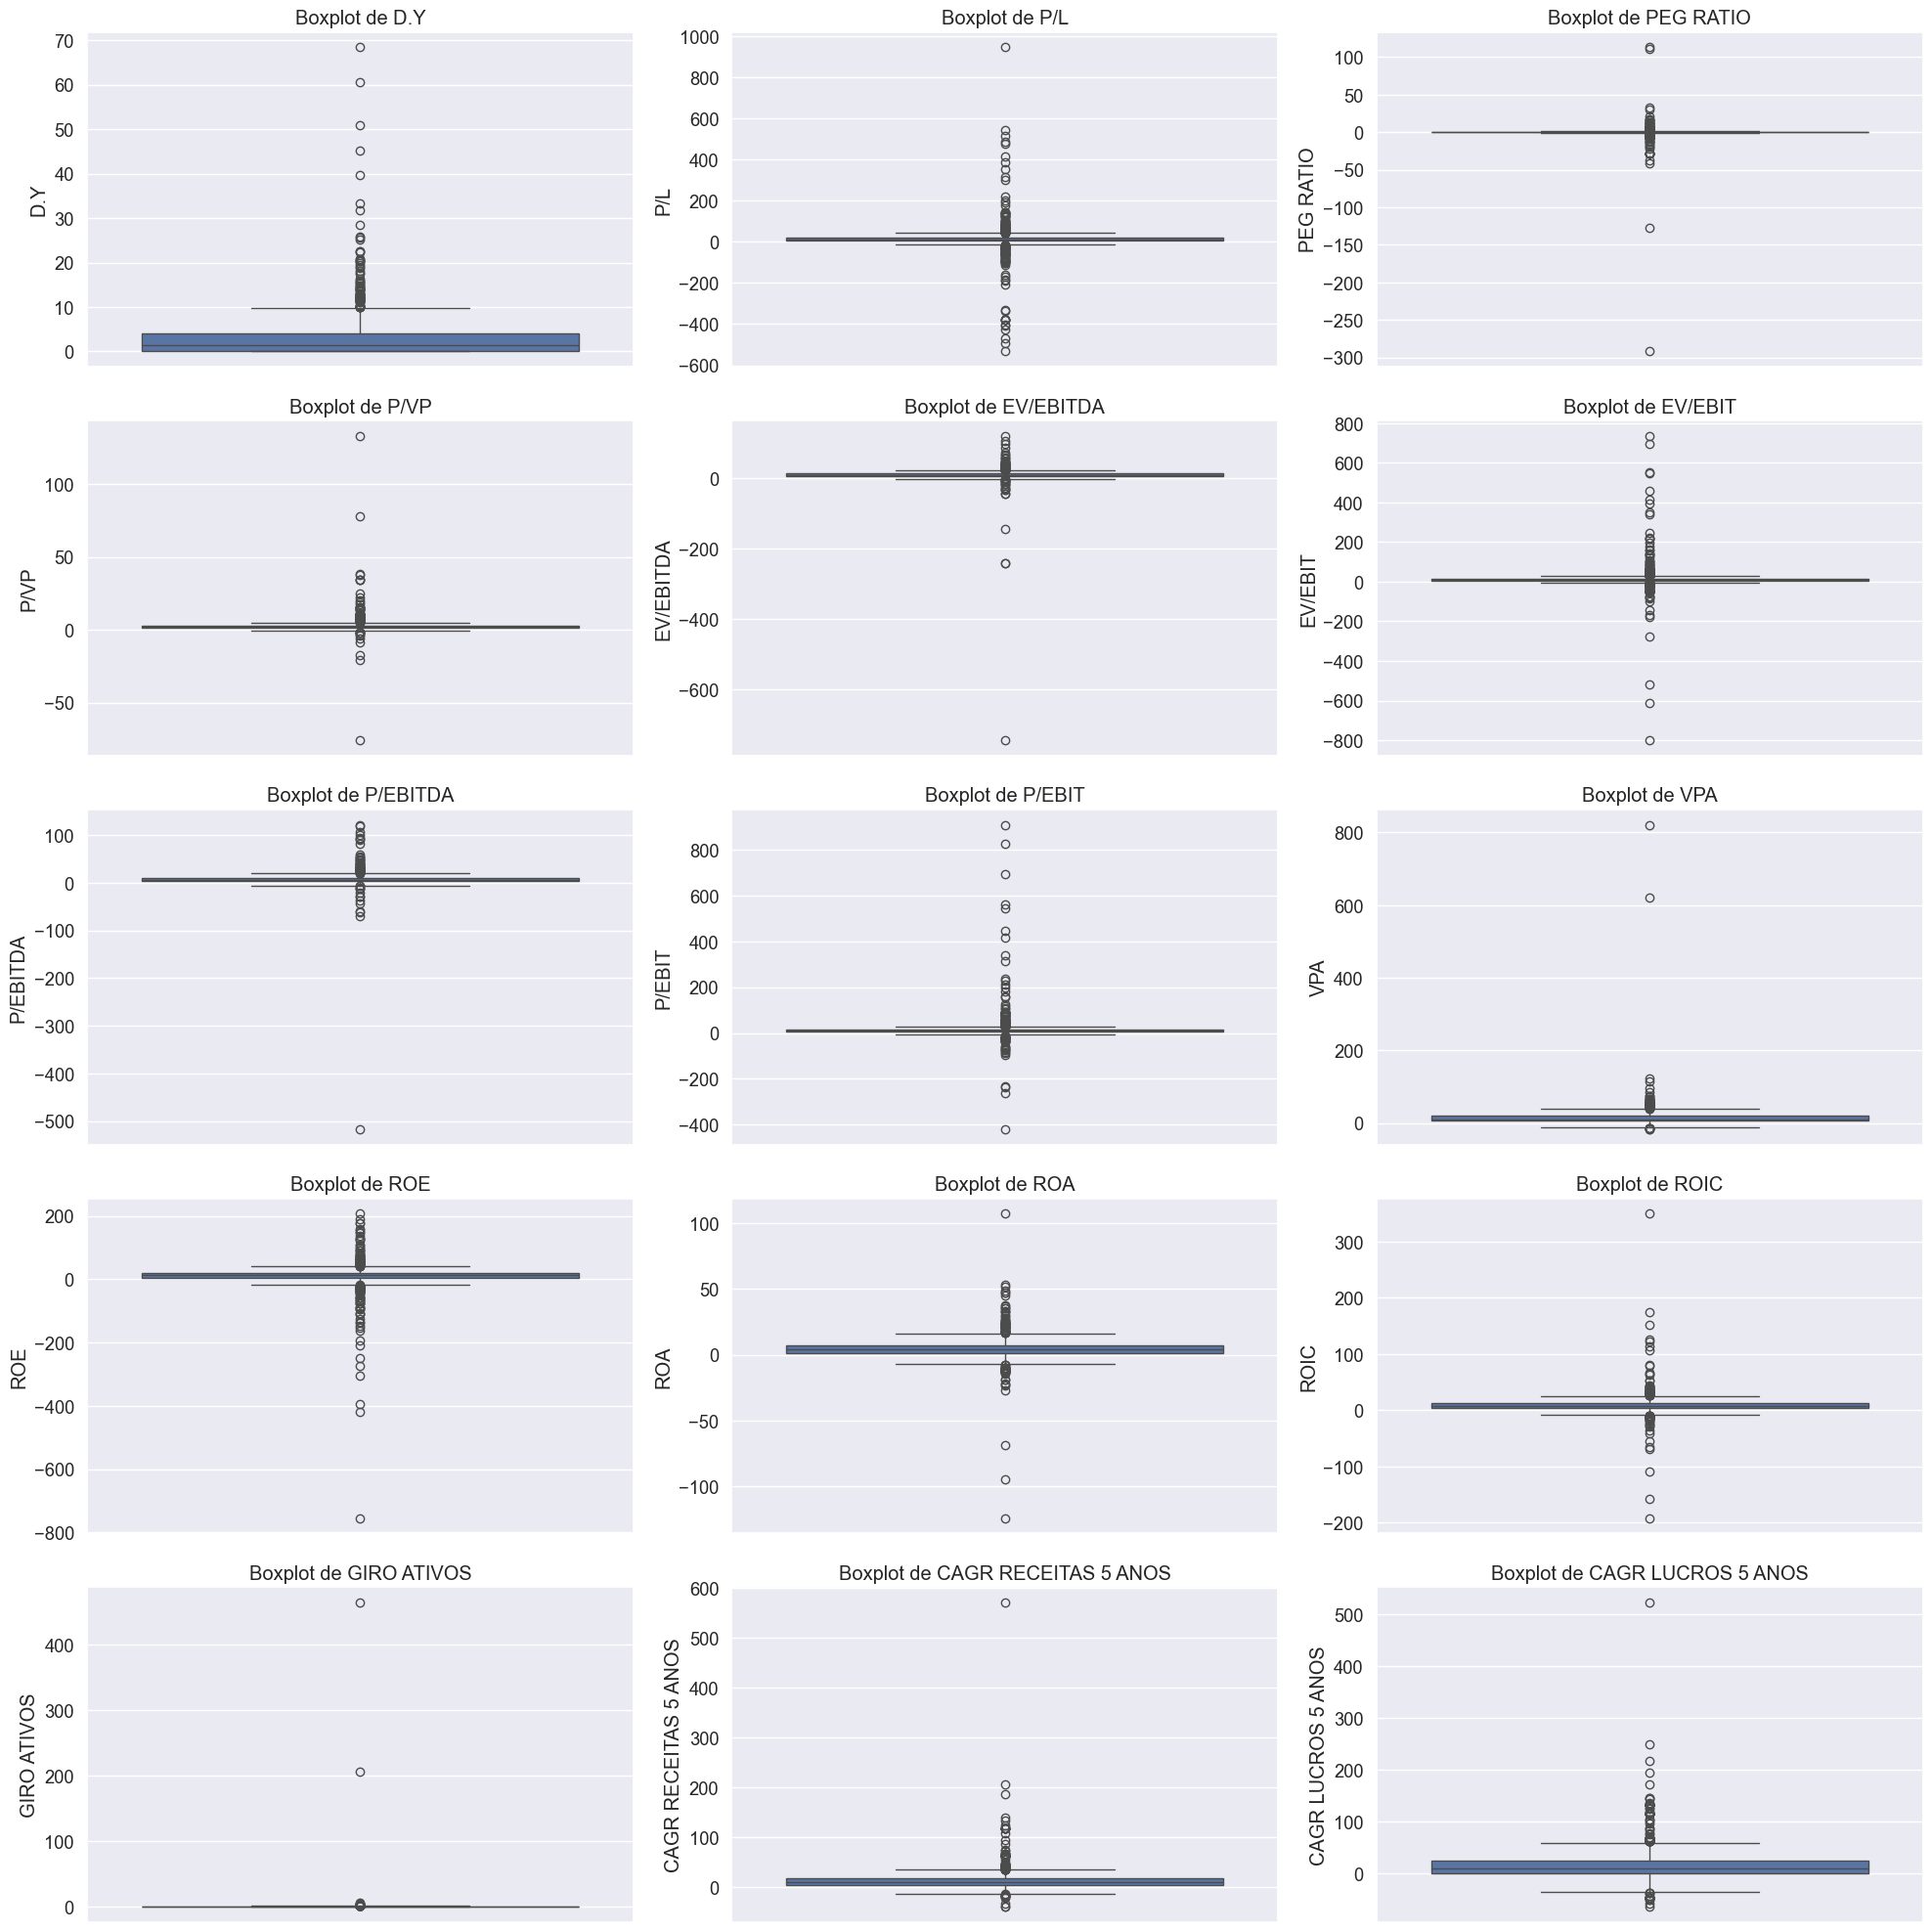

In [101]:
# Plotando boxplots para as variáveis numéricas
plt.figure(figsize=(20, 20))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[var].dropna())
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


Como podemos ver, temos alguns outliers que se destacam significativamente dos demais. Na análise financeira, especialmente ao lidar com indicadores de empresas, é crucial considerar que as diferenças entre as empresas podem ser substanciais. Essas diferenças podem refletir condições reais de mercado, estratégias empresariais específicas ou a própria natureza volátil do mercado financeiro. Portanto, não removeremos os outliers, pois sua presença é relevante para uma análise precisa e completa, evitando assim distorções nos resultados.

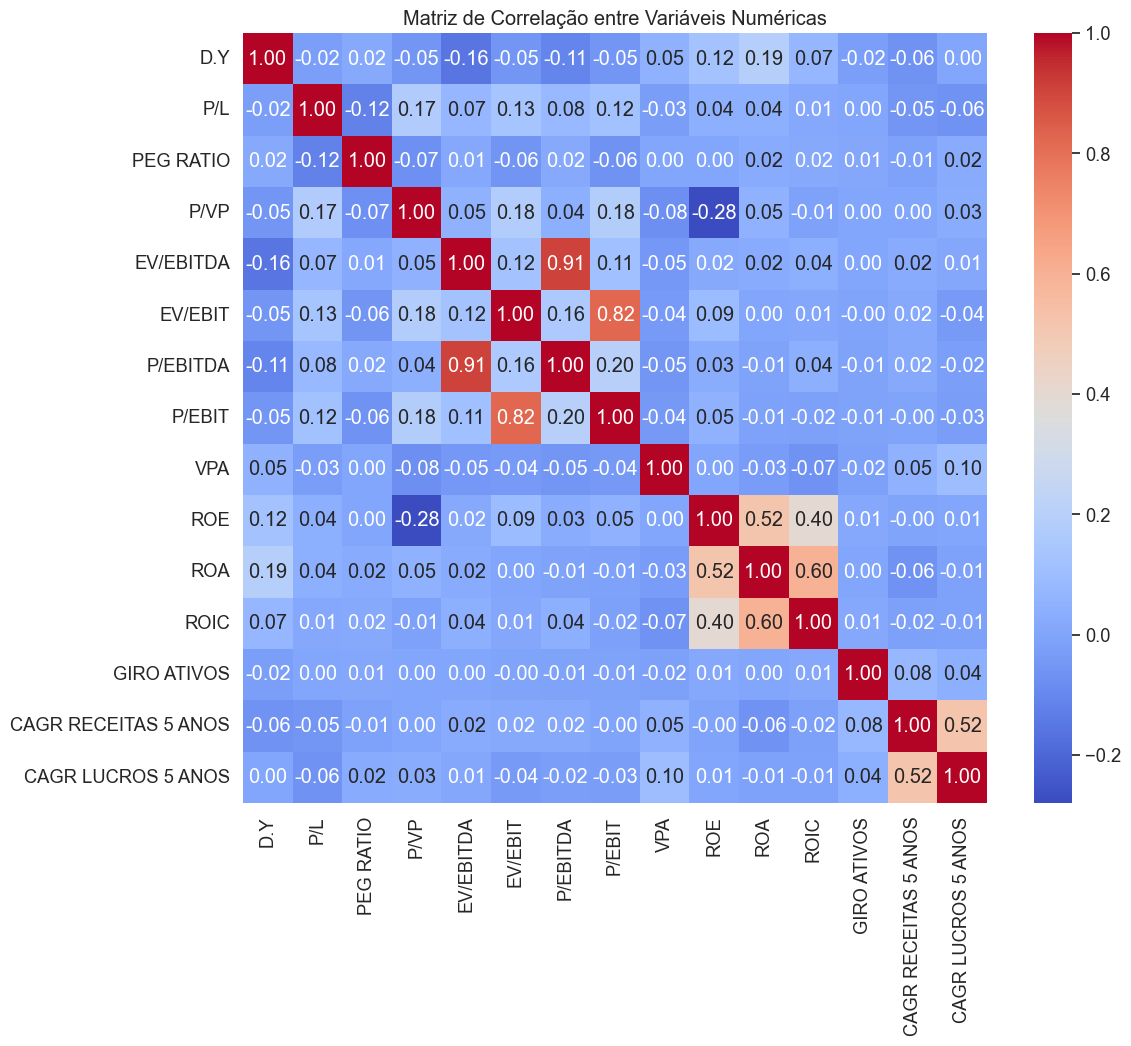

In [102]:
correlation_matrix = df[numeric_vars].corr()

# Plotando o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


Como esperado, observamos uma relação entre os indicadores de retorno sobre o patrimônio líquido (ROE), retorno sobre o capital investido (ROIC) e retorno sobre os ativos (ROA) com os indicadores de lucratividade EBITIDA, além de uma correlação com o indicador composto CAGR (CAGR RECEITAS 5 ANOS e CAGR LUCROS 5 ANOS).

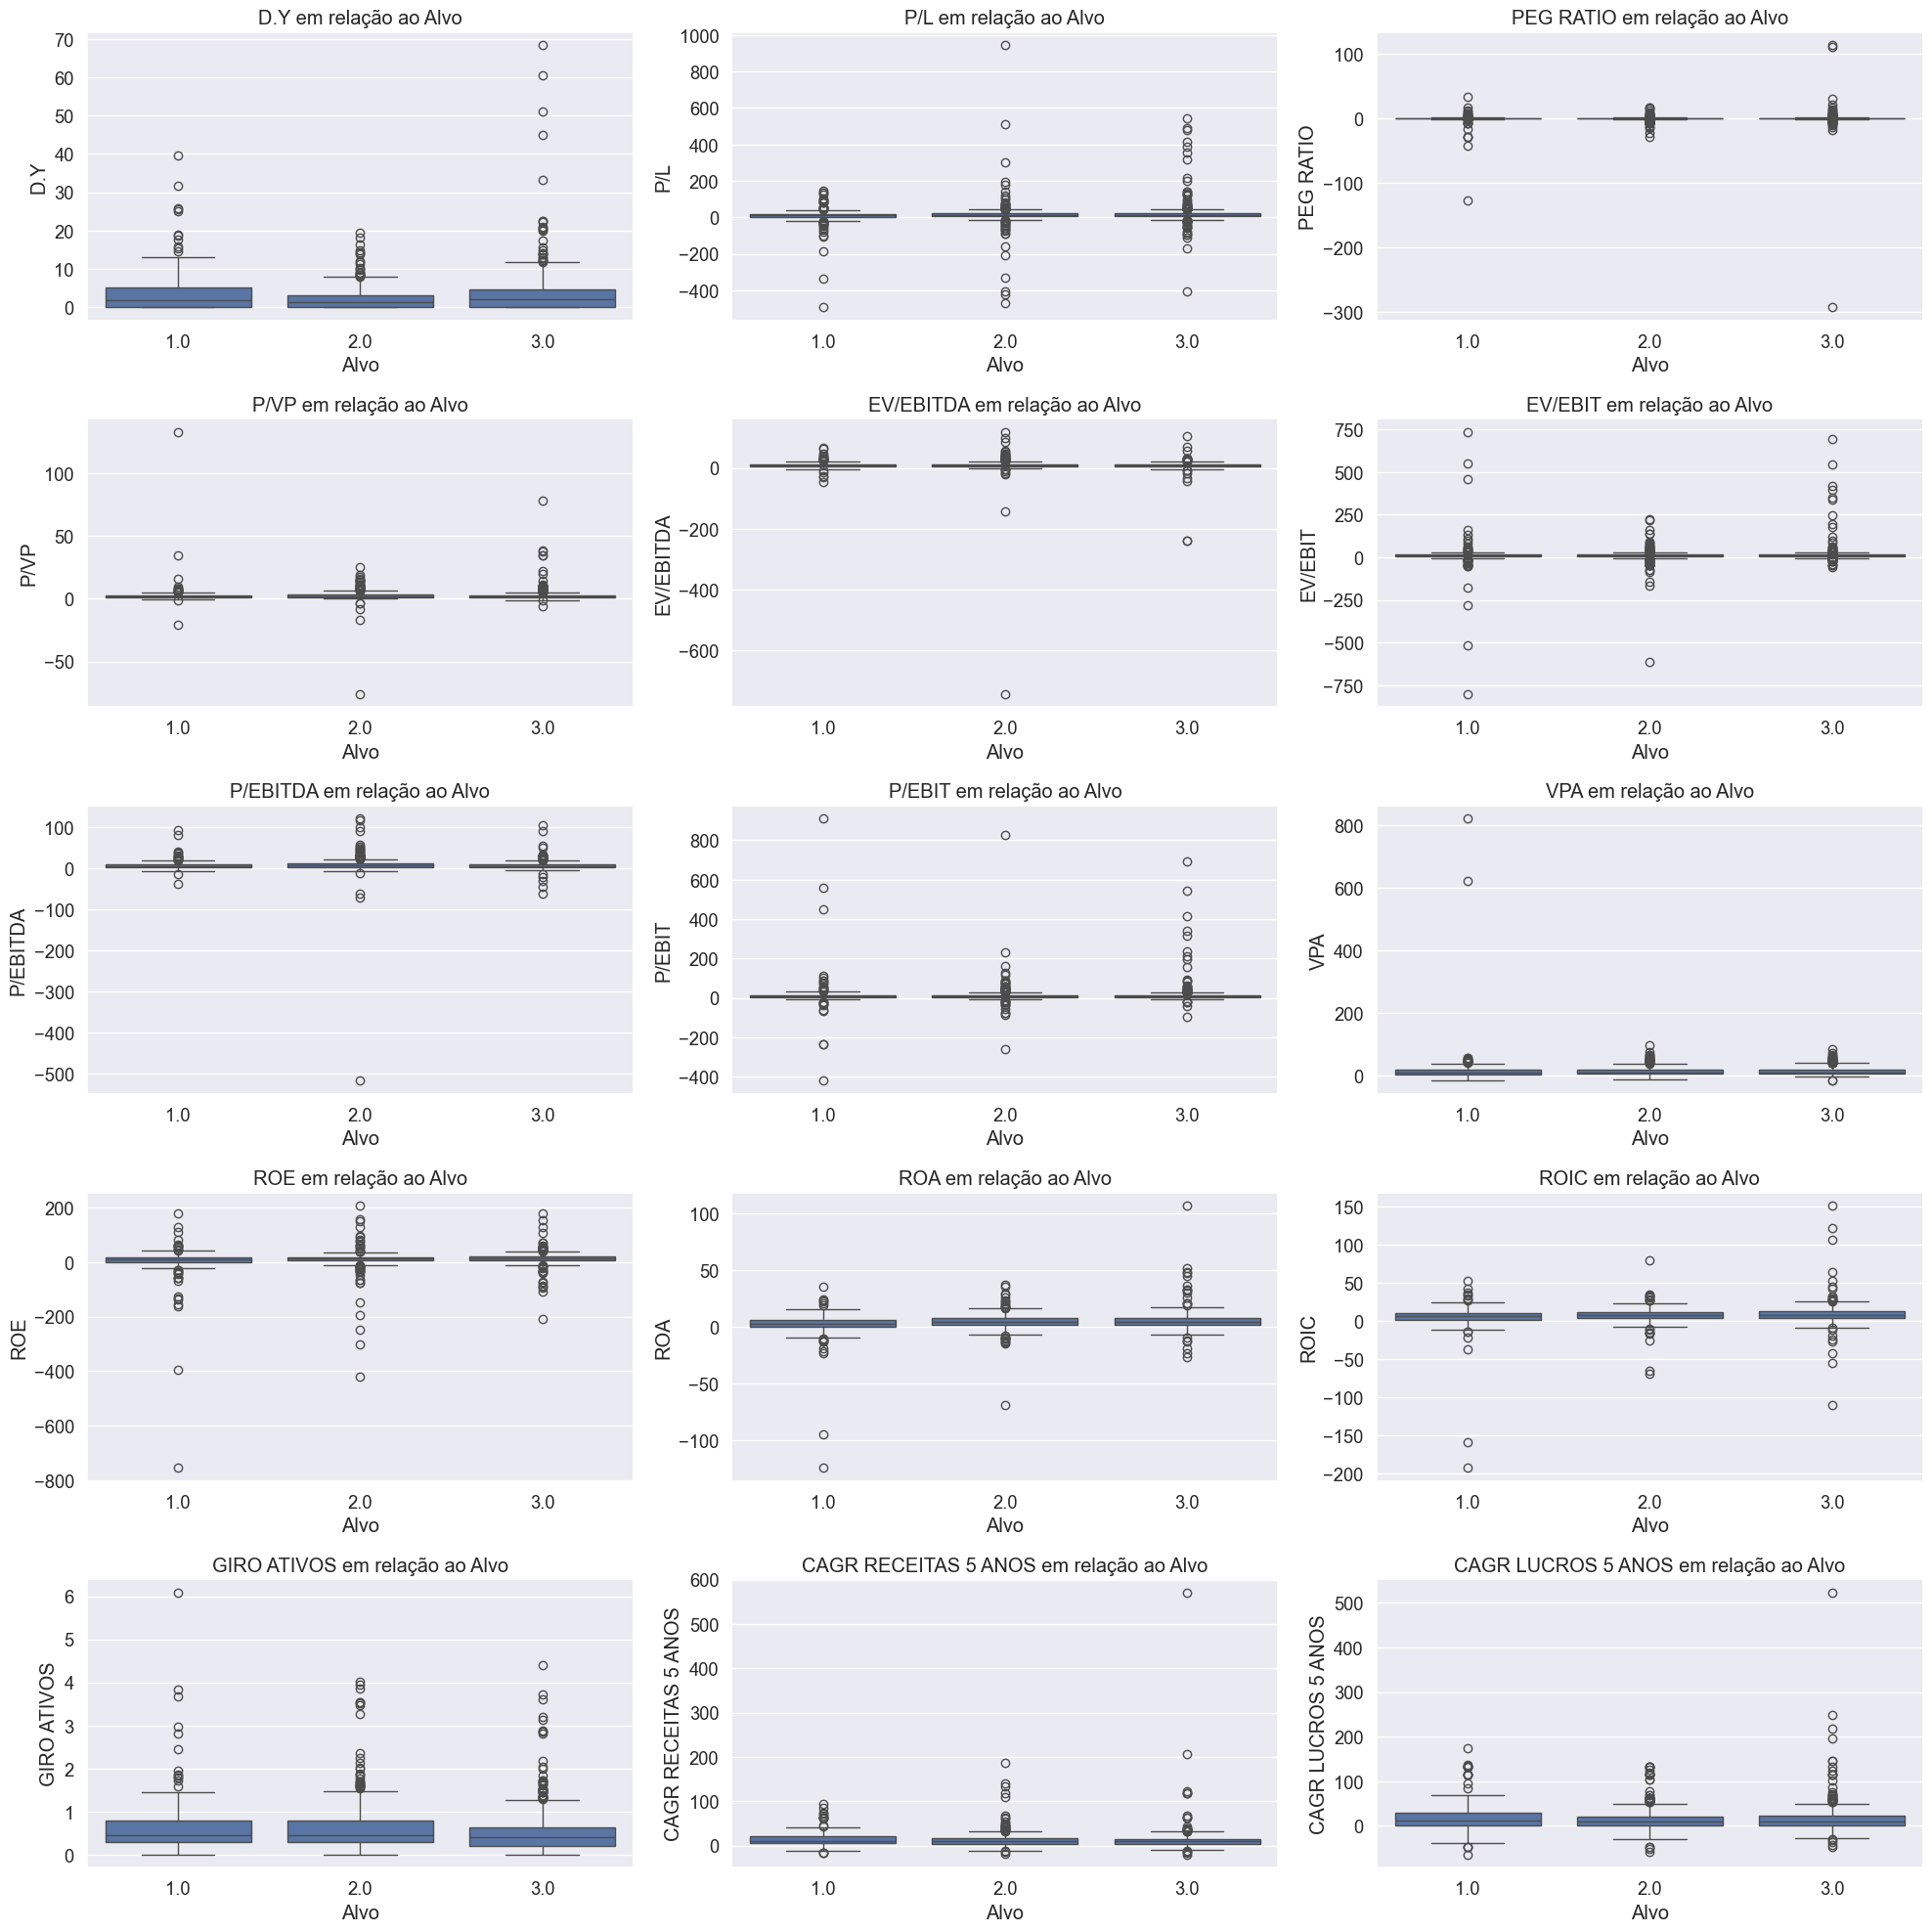

In [103]:
# Plotando os boxplots para cada variável numérica em relação ao alvo
plt.figure(figsize=(20, 20))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='Alvo', y=var, data=df_limpo)
    plt.title(f'{var} em relação ao Alvo')
    plt.xlabel('Alvo')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


Ao analisar os boxplots das variáveis numéricas em relação ao alvo ("Barata", "Cara", "Neutra"), observa-se que não há uma clara diferenciação entre as categorias. Os gráficos mostram que a maioria dos valores está distribuída de forma equilibrada entre as categorias, com exceção de alguns outliers que estão mais distantes da distribuição principal. Isso sugere que essas variáveis podem não ter uma relação direta ou significativa com a classificação das ações como "Barata", "Cara" ou "Neutra".

<a id="3"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Escolha do algoritmo</p>

## Primeiro vamos fazer o split dos dados

In [104]:
# Remover linhas onde a coluna alvo é nula
df_final = df_limpo.dropna(subset=['Alvo'])

# Definir colunas de features e alvo
features = df_final.drop(['Ano', 'Ticker', 'PrecoAnoSeguinte', 'PrecoAnoAtual', 'Alvo'], axis=1)
#features = df_final[['P/L', 'P/VP', 'VPA', 'ROE']]
target = df_final['Alvo']

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=99)

# Verificar as dimensões dos conjuntos
print("Dimensões do conjunto de treinamento (features):", X_train.shape)
print("Dimensões do conjunto de teste (features):", X_test.shape)
print("Dimensões do conjunto de treinamento (alvo):", y_train.shape)
print("Dimensões do conjunto de teste (alvo):", y_test.shape)


Dimensões do conjunto de treinamento (features): (944, 30)
Dimensões do conjunto de teste (features): (236, 30)
Dimensões do conjunto de treinamento (alvo): (944,)
Dimensões do conjunto de teste (alvo): (236,)


Agora, vamos aplicar uma técnica de escala nos dados, garantindo que façamos isso separadamente nos conjuntos de treinamento e teste para evitar vazamento de dados.

In [105]:
# Inicializar o scaler
scaler = MinMaxScaler()

# Normalizar os dados de treinamento e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Agora vamos treinar os modelos para os seguintes algoritmos: Random Forest, Gradient Boosting, Support Vector Machines (SVM), K-Nearest Neighbors (KNN) e Naive Bayes

Posteriormente vamos comparar os resultados, selecionar o melhor e tentar aprimorar com a utilização de hiperparametros.

In [106]:
# Inicializar os classificadores
rf = RandomForestClassifier(random_state=99)
gb = GradientBoostingClassifier(random_state=99)
svc = SVC(random_state=99)
knn = KNeighborsClassifier()
nb = GaussianNB()

# Treinar os classificadores
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Fazer previsões nos dados de teste
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)
svc_pred = svc.predict(X_test)
knn_pred = knn.predict(X_test)
nb_pred = nb.predict(X_test)

# Imprimir os relatórios de classificação para cada algoritmo
print("Random Forest:")
print(classification_report(y_test, rf_pred))

print("Gradient Boosting:")
print(classification_report(y_test, gb_pred))

print("Support Vector Machines:")
print(classification_report(y_test, svc_pred))

print("K-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))

print("Naive Bayes:")
print(classification_report(y_test, nb_pred))


Random Forest:
              precision    recall  f1-score   support

         1.0       0.26      0.15      0.19        39
         2.0       0.48      0.46      0.47        93
         3.0       0.58      0.68      0.63       104

    accuracy                           0.51       236
   macro avg       0.44      0.43      0.43       236
weighted avg       0.49      0.51      0.49       236

Gradient Boosting:
              precision    recall  f1-score   support

         1.0       0.46      0.28      0.35        39
         2.0       0.49      0.42      0.45        93
         3.0       0.58      0.73      0.64       104

    accuracy                           0.53       236
   macro avg       0.51      0.48      0.48       236
weighted avg       0.52      0.53      0.52       236

Support Vector Machines:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        39
         2.0       0.43      0.10      0.16        93
         3.0    

A análise dos resultados dos modelos mostra que o Gradient Boosting teve o melhor desempenho em termos de precisão, recall e pontuação F1 para a classe 2. O Random Forest também teve um desempenho razoável, enquanto o SVM teve dificuldades em prever a classe 1. O KNN teve um desempenho intermediário, e o Naive Bayes teve dificuldades em prever as classes 1 e 3.

Em geral, nenhum dos modelos apresentou um desempenho excepcional, indicando que ainda há espaço para melhorias. É possível tentar ajustar os hiperparâmetros dos modelos.

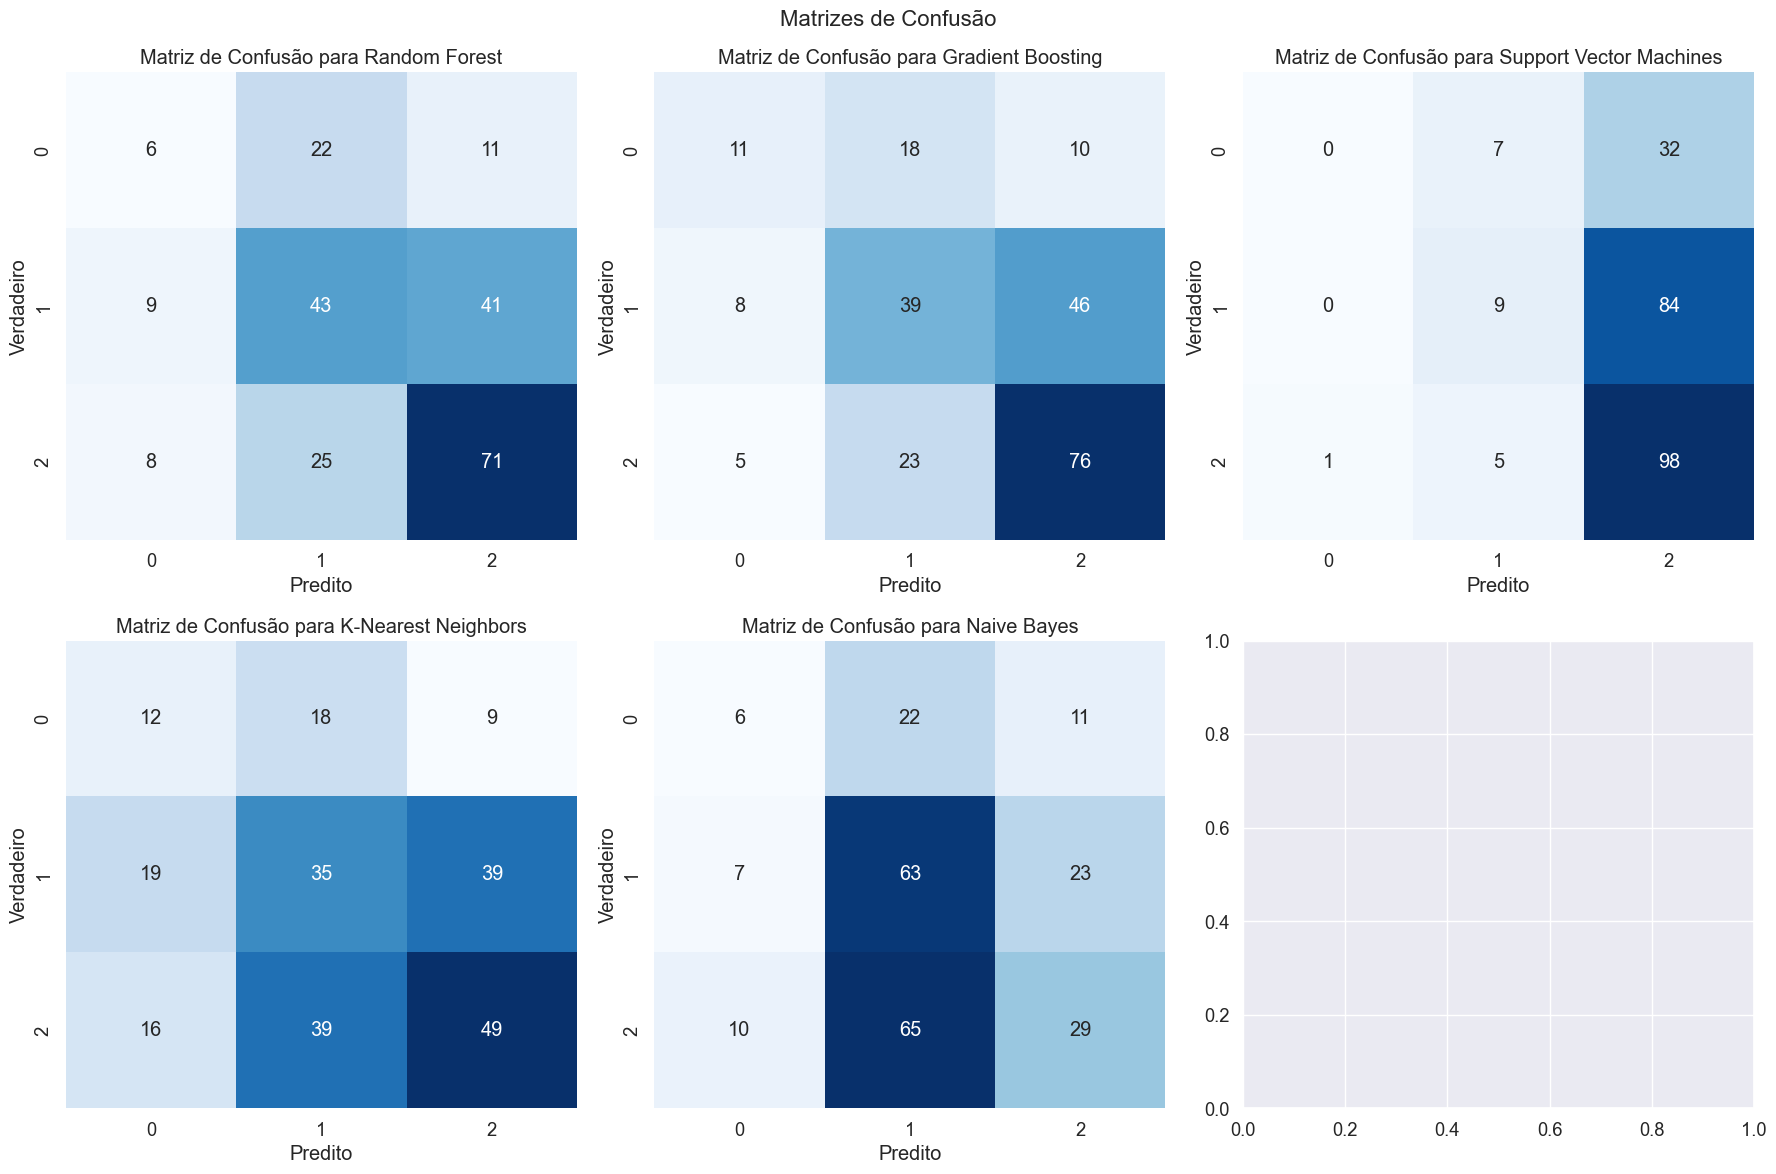

In [107]:
# Função para imprimir a matriz de confusão como um heatmap em um subplot
def plot_confusion_matrix_subplot(ax, nome_modelo, y_true, y_pred):
    matriz = confusion_matrix(y_true, y_pred)
    sns.set(font_scale=1.2)
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Verdadeiro')
    ax.set_title(f'Matriz de Confusão para {nome_modelo}')

# Criar uma figura com subplots agrupados a cada 3
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Imprimir as matrizes de confusão para cada modelo
plot_confusion_matrix_subplot(axs[0, 0], "Random Forest", y_test, rf_pred)
plot_confusion_matrix_subplot(axs[0, 1], "Gradient Boosting", y_test, gb_pred)
plot_confusion_matrix_subplot(axs[0, 2], "Support Vector Machines", y_test, svc_pred)
plot_confusion_matrix_subplot(axs[1, 0], "K-Nearest Neighbors", y_test, knn_pred)
plot_confusion_matrix_subplot(axs[1, 1], "Naive Bayes", y_test, nb_pred)

# Adicionar título à figura
plt.suptitle('Matrizes de Confusão', fontsize=16)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()



Os modelos apresentaram resultados insatisfatórios, com dificuldades em classificar corretamente as diferentes categorias. O Gradient Boosting teve um desempenho ligeiramente superior aos demais, porém ainda não é o ideal. Vamos selecioná-lo para ajustar os hiperparâmetros na tentativa de melhorar os resultados.

Melhor Score: 0.45972769858120177
Melhores Parâmetros: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 40}
Melhor Modelo (Gradient Boosting):
              precision    recall  f1-score   support

         1.0       0.17      0.03      0.04        39
         2.0       0.45      0.15      0.23        93
         3.0       0.46      0.88      0.61       104

    accuracy                           0.45       236
   macro avg       0.36      0.35      0.29       236
weighted avg       0.41      0.45      0.36       236



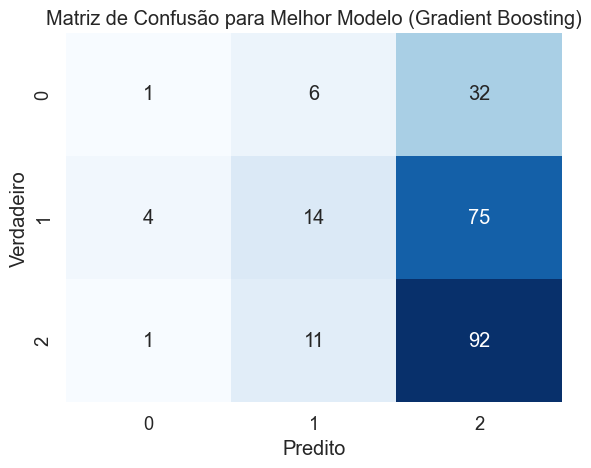

In [108]:
# Definir os parâmetros que deseja testar
param_grid = {
    'n_estimators': [1, 3, 5, 10, 25, 30, 35, 40, 45, 50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7, 10, 15]
}

# Inicializar o classificador Gradient Boosting
gb = GradientBoostingClassifier(random_state=99)

# Inicializar o GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Treinar o GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir o melhor score e os melhores parâmetros
print("Melhor Score:", grid_search.best_score_)
print("Melhores Parâmetros:", grid_search.best_params_)

# Fazer previsões nos dados de teste usando o modelo com os melhores parâmetros
best_gb = grid_search.best_estimator_
best_gb_pred = best_gb.predict(X_test)

# Imprimir o relatório de classificação do melhor modelo
print("Melhor Modelo (Gradient Boosting):")
print(classification_report(y_test, best_gb_pred))

# Imprimir a matriz de confusão do melhor modelo
plot_confusion_matrix_subplot(plt.gca(), "Melhor Modelo (Gradient Boosting)", y_test, best_gb_pred)
plt.show()

Sem hiperparâmetros, o modelo Gradient Boosting obteve uma precisão média de 51% e uma acurácia de 53%. Após ajustar os hiperparâmetros, o modelo teve uma queda considerável na precisão média para 36% e na acurácia para 45%. No entanto, é importante observar que o modelo ajustado apresentou uma melhora significativa na capacidade de identificar a classe 1, que passou de 28% para 3% de recall, e na classe 2, que foi de 42% para 15%. Já a classe 3 teve um aumento de recall de 73% para 88%, o que indica que o modelo ajustado tem uma melhor capacidade de identificar corretamente essa classe, apesar da queda geral na precisão média e na acurácia.